<a href="https://colab.research.google.com/github/dsamsonov1/to2rep/blob/main/2_stubs_match_plot_nice_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data preview-latex-style
  rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-framework-java libcommons-logging-j

In [2]:
pip install latex shapely

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=b800f74f921237a93cb7d5df1e4d96b169b54f0ef5f245cff40d5410d9106d08
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7228 sha256=431086ce9c2bf6524e5e37cd59a3dd72232b843b35365330a29ece1cafb8917c
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=da68e56b0836f0deb073104d13f3a4d1370f60b9c125481497855aec4ad2802d
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f358a0291e7681bae
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w

In [3]:
!sudo apt install cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 26.0 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cm-super-minimal all 0.3.4-17 [5,777 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cm-super all 0.3.4-17 [20.2 MB]
Fetched 26.0 MB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to fronte

<ipython-input-12-51b00fd2a009>:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("rainbow")


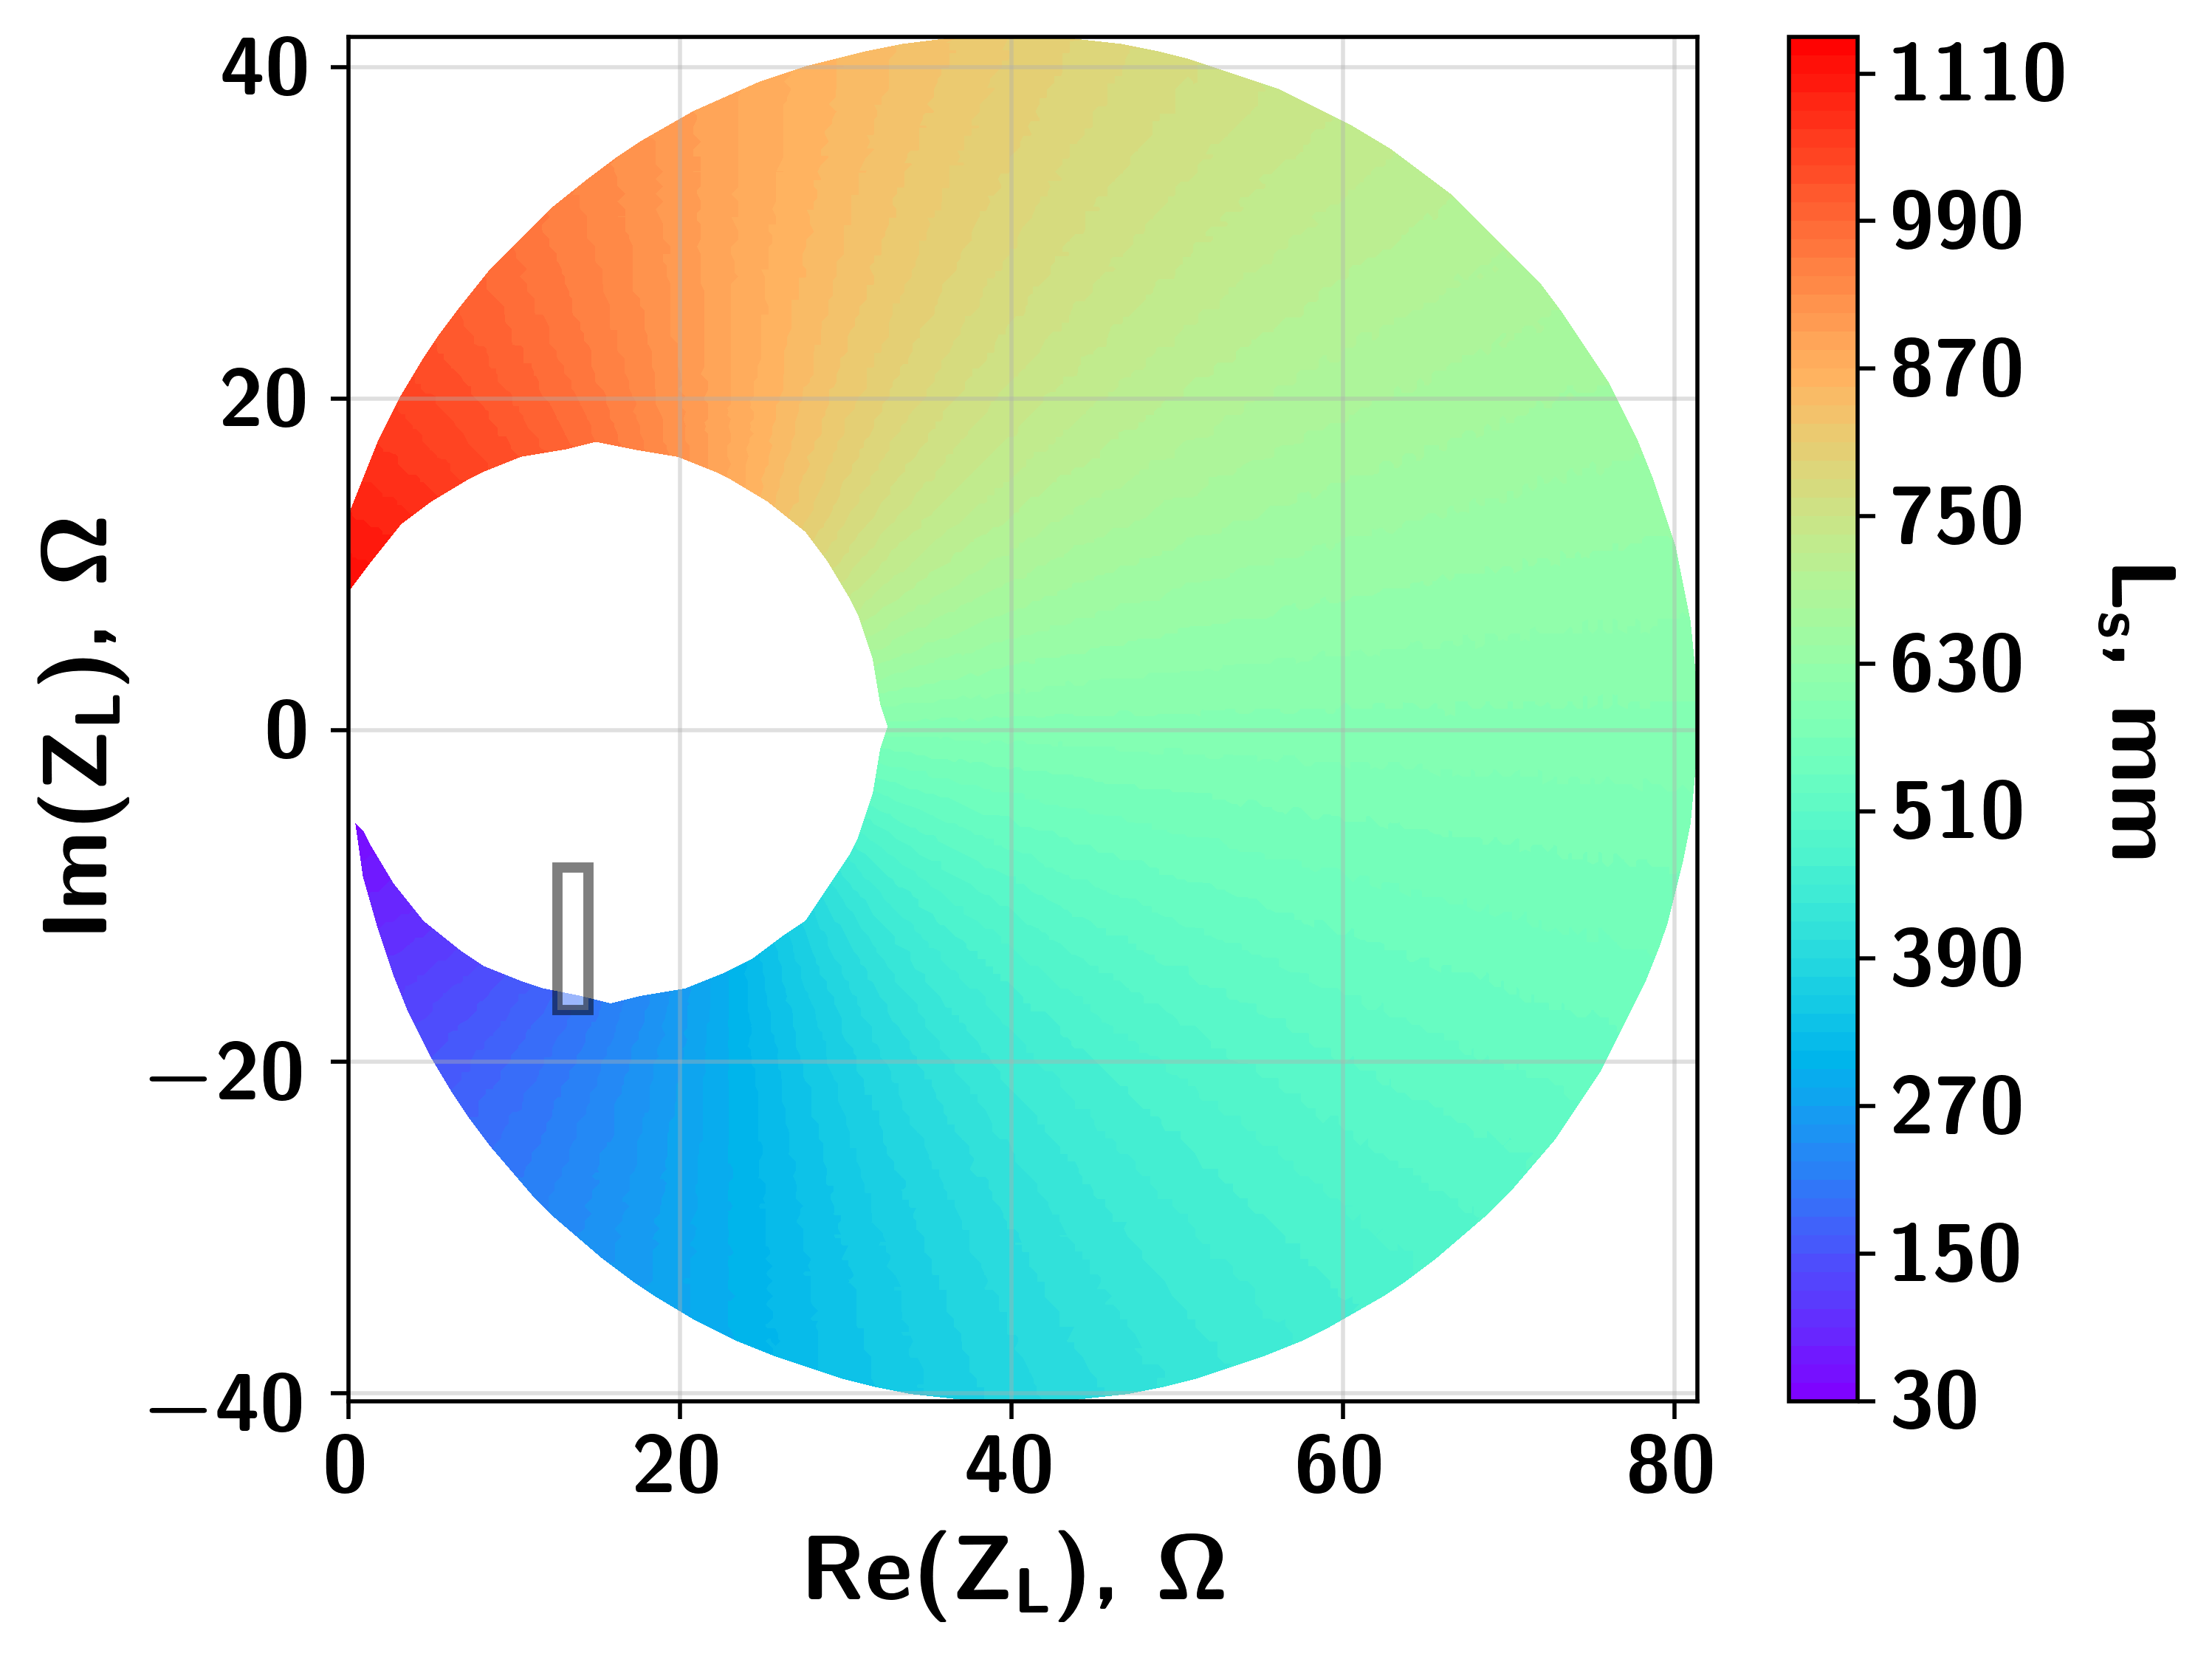

In [12]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.tri as tri
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from scipy.spatial import ConvexHull
from scipy import interpolate
from shapely.validation import make_valid

'''
USER INPUT
'''
ymin=0.05         # ksqr<ymin
num_x=200        # resolution of x (number of points from 0 to Pi)
num_z_re=200      # resolution of real part of z2
num_z_im=200      # resolution of imaginary part of z2

z_re_min=0        # real part of z belong [z_re_min, z_re_max]
z_re_max=90     # real part of z belong [z_re_min, z_re_max]
z_im_min=-45     # image part of z belong [z_im_min, z_im_max]
z_im_max=45     # image part of z belong [z_im_min, z_im_max]

z_re_log=False    # logarifm scale of real axis. if True - real part of z2 belong to [z_re_0+10^z_re_pow1, z_re_0+10^z_re_pow2]
z_im_log=False    # logarifm scale of image axis. if True - image part of z2 belong to [z_im_0+10^z_im_pow1, z_im_0+10^z_im_pow2]
z_re_pow1=-5      # set if z_re_log=True, else will be ignored
z_re_pow2=3       # set if z_re_log=True, else will be ignored
z_im_pow1=0       # set if z_im_log=True, else will be ignored
z_im_pow2=1       # set if z_im_log=True, else will be ignored
z_re_0=0          # set if z_re_log=True, else will be ignored; real part of z2 belong to [z_re_0+10^z_re_pow1, z_re_0+10^z_re_pow2]
z_im_0=-15        # set if z_im_log=True, else will be ignored; image part of z2 belong to [z_im_0+10^z_im_pow1, z_im_0+10^z_im_pow2]

alpha = 0.3      # dB/m cable attenuation
eps = 2.5

l_max = 3e8/(80e6*np.sqrt(eps))/2

plot_points=False#False#

def f(x, z1, z2):
    alpha_np = alpha/8.686
    beta = 2*np.pi*80e6*np.sqrt(eps)/3e8
    Zs = 50*np.tanh(alpha_np*x+1j*beta*x)
    Zl = z1+1j*z2
    Z_IN = Zs*Zl/(Zs+Zl)
    return np.abs((Z_IN-50)/(Z_IN+50))**2

num_z1=num_z_re
num_z2=num_z_im
z1_0=z_re_0
z2_0=z_im_0

#x = np.linspace(0,1, num=num_x)*np.pi
x = np.linspace(0, l_max, num=num_x)

if z_re_log:
    z1 = z1_0+np.logspace(z_re_pow1, z_re_pow2, num=num_z1)
else:
    z1 = np.linspace(z_re_min, z_re_max, num=num_z1)

if z_im_log:
    z2 = z2_0+np.logspace(z_im_pow1, z_im_pow2, num=num_z2)
else:
    z2 = np.linspace(z_im_min, z_im_max, num=num_z2)

Z1, Z2, X = np.meshgrid(z1, z2, x, indexing='ij')
Y=f(X, Z1, Z2)

z1_m_raw, z2_m_raw, x_m = np.where(Y<=ymin)
#print(x[x_m])
z1_m_raw=z1[z1_m_raw]
z2_m_raw=z2[z2_m_raw]
x_m = x[x_m]
k = z1_m_raw[0]
m = z2_m_raw[0]
c = 0
z1_m, z2_m, w_m, l_m = [k], [m], [], []

l_avg = [x_m[0]]
for i in range(len(x_m)):
    if z1_m_raw[i]==k and z2_m_raw[i]==m:
        c+=1
        l_avg.append(x_m[i])
    else:
        l_m.append(np.mean(l_avg))
        w_m.append(c)
        l_avg = [x_m[i]]
        c=1
        z1_m.append(z1_m_raw[i])
        z2_m.append(z2_m_raw[i])
        k=z1_m[-1]
        m=z2_m[-1]

w_m.append(c)
l_m.append(np.mean(l_avg))
z1_m=np.array(z1_m)
z2_m=np.array(z2_m)

Z1, Z2 = np.meshgrid(z1, z2)
Z1 = Z1.flatten()
Z2 = Z2.flatten()
zms = list(zip(z1_m, z2_m))
points = []
for i in range(len(Z1)):
    p = (Z1[i], Z2[i])
    if not p in zms and np.hypot(p[0]-40, p[1])<40:
        points.append(p)
points = np.array(points)
xout = points[:, 0]
yout = points[:, 1]
hull = ConvexHull(points)
polygon = make_valid(Polygon(list(points[hull.vertices])))

triang = tri.Triangulation(z1_m, z2_m)
xs = z1_m[triang.triangles]
ys = z2_m[triang.triangles]
mask = np.full((xs.shape[0]), False, dtype=bool)
for i in range(xs.shape[0]):
    p = make_valid(Polygon(list(zip(xs[i], ys[i]))))
    mask[i] = polygon.intersects(p)
triang.set_mask(mask)


mpl.rcParams['text.usetex']=True
#mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['text.latex.preamble']=r"""
\usepackage{bm}
\usepackage{amsmath}
\usepackage{sfmath} \boldmath
"""
mpl.rcParams['font.weight'] = 'bold'


fontstyle = {'size':18,
             'weight':'bold'}
cmap = plt.cm.get_cmap("rainbow")
levels = 100

plt.figure(dpi=500)
plt.grid(which='both', alpha=0.4)


plt.tricontourf(triang, np.array(l_m)*1000, levels=levels, cmap=cmap)
if plot_points:
    plt.plot(z1_m, z2_m, '.', color='red', alpha=0.5)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.xlabel(r"$\mathbf{Re(Z_{L}),\, \Omega}$", fontdict=fontstyle)
plt.ylabel(r"$\mathbf{Im(Z_{L}),\, \Omega}$", fontdict=fontstyle)
if z_re_log:
    plt.xscale('log')
if z_im_log:
    plt.yscale('log')

ax = plt.gca()
ticksize = 16
ax.xaxis.set_tick_params(labelsize=ticksize)
ax.yaxis.set_tick_params(labelsize=ticksize)

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel(r'$\mathbf{L_{s},\, mm}$', rotation=270, fontdict=fontstyle)
cbar.ax.tick_params(labelsize=ticksize)

rect = Rectangle((12.6, -16.9), 1.9, 8.6, linewidth=2, edgecolor='black', facecolor='white', alpha=0.5)
plt.gca().add_patch(rect)

plt.gca().set_aspect('equal')
plt.show()


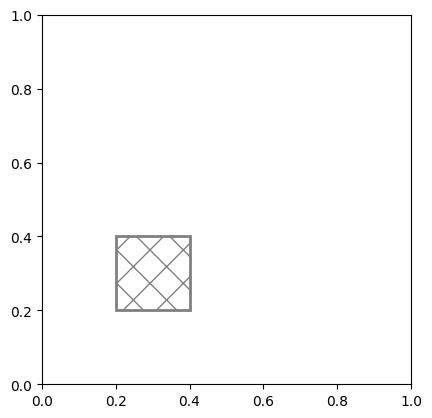

In [23]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

ax = plt.gca()
#rect = Rectangle((12.6, -16.9), 1.9, 8.6, linewidth=2, edgecolor='r', facecolor='b')
rect = Rectangle((0.2, 0.2), 0.2, 0.2, linewidth=2, edgecolor='grey', facecolor='none', hatch='\\/')
ax.add_patch(rect)
ax.set_aspect('equal')
plt.show()